# Reto 2 Aula Expandida

__Juan David Parra Cantor__

*__ID__*: 000324320

# Ejercicio de Métodos Numéricos: Método de Colocación con Funciones de Base Radial (RBF)

## Planteamiento del Ejercicio

**Ecuación de Biocalor:**

$$
k \left( \frac{d^2T}{dx^2} + \frac{\omega}{x} \frac{dT}{dx} \right) + c(x)(T_s - T) + Q_m(x) = 0, \quad 0 < x_a < x < x_b
$$

### Nivel 4
- $ k $: constante [W/m/K], conductividad térmica.
- $ \omega = 1 $
- $ c(x) = a \tanh \left( b \left( \frac{x - x_a}{x_b - x_a} \right)^2 \right) $, donde $ a $ y $ b $ son constantes.
- $ Q_m(x) = mT + p $, donde $ m $ y $ p $ son constantes.
- $ T_s = T_{sc} $ : constante [°C o K], temperatura promedio de la sangre en el tejido.
- Condiciones de frontera:
  - $ \frac{dT}{dx} \bigg|_{x = x_a} = q_a $, donde $ q_a $ es una constante [K/m].
  - $ T(x_b) - \gamma \frac{dT}{dx} \bigg|_{x = x_b} = r_b $, donde $ r_b $ y $ \gamma $ son constantes.

## Analísis del caso

1. **Ecuación de Biocalor:**
   - La ecuación de Biocalor describe la distribución de temperatura en un medio biológico considerando conducción térmica, perfusión sanguínea y generación metabólica de calor.
   - Para este nivel, debemos resolver la ecuación diferencial con condiciones específicas y funciones dadas.

2. **Funciones y Parámetros:**
   - La conductividad térmica $ k $ es constante.
   - El término convectivo es $ \omega = 1 $.
   - La función de perfusión $ c(x) $ es $ a \tanh \left( b \left( \frac{x - x_a}{x_b - x_a} \right)^2 \right) $, lo que introduce una variación espacial en la perfusión sanguínea.
   - La generación de calor $ Q_m(x) $ es una función lineal de la temperatura, $ mT + p $.

3. **Condiciones de Frontera:**
   - En $ x = x_a $, se especifica el flujo de calor $ \frac{dT}{dx} \bigg|_{x = x_a} = q_a $.
   - En $ x = x_b $, se especifica una combinación de temperatura y flujo de calor, $ T(x_b) - \gamma \frac{dT}{dx} \bigg|_{x = x_b} = r_b $.

4. **Método de Colocación con Funciones de Base Radial (RBF):**
   - Utilizaremos funciones de base radial para aproximar la solución de la ecuación diferencial.
   - Las RBF son funciones que dependen de la distancia desde un centro determinado y se utilizan para interpolación y solución de ecuaciones diferenciales.
   - Se elegirán nodos en el dominio $ [x_a, x_b] $ y se empleará una RBF distinta a la Multicuádrica.

## Pasos para Resolver el Ejercicio

1. **Selección de la RBF:**
   - Elegir una función de base radial adecuada
      - En el caso de esté ejercicio se trabajará la Gaussiana y la Multicúadrica

2. **Formulación del Problema:**
   - Escribir la ecuación de Biocalor en términos de la RBF seleccionada.
   - Establecer el sistema de ecuaciones a partir de las condiciones de frontera y la forma de la RBF.

3. **Discretización:**
   - Colocar nodos en el dominio y formular las ecuaciones discretas en esos puntos.

4. **Resolución del Sistema:**
   - Resolver el sistema de ecuaciones lineales resultante para obtener los coeficientes de la RBF.

5. **Obtención de la Solución:**
   - Evaluar la solución aproximada en el dominio y compararla con la solución de referencia.

6. **Análisis del Error:**
   - Calcular y analizar el error de la solución obtenida comparándola con una solución analítica o de referencia.


## Proceso Analítico

### 1. Ecuación de Biocalor

La ecuación de Biocalor es:

$$
k \left( \frac{d^2T}{dx^2} + \frac{\omega}{x} \frac{dT}{dx} \right) + c(x)(T_s - T) + Q_m(x) = 0, \quad 0 < x_a < x < x_b
$$

---

### 2. Función de Base Radial Gaussiana

Elegimos la función Gaussiana como nuestra RBF:

$$
\phi(r) = e^{-\left(\frac{r}{\epsilon}\right)^2}
$$

donde $ r $ es la distancia euclidiana entre dos puntos y $ \epsilon $ es el parámetro de forma que controla el ancho de la función.

#### 2.1. Discretización del Dominio

Dividimos el dominio $[x_a, x_b]$ en $N$ nodos $ x_i $. La distancia euclidiana entre dos nodos $ x_i $ y $ x_j $ se define como:

$$
r_{ij} = |x_i - x_j|
$$

#### 2.2. Aproximación de la Solución

Aproximamos la solución $ T(x) $ usando una combinación lineal de las RBF centradas en los nodos:

$$
T(x) \approx \sum_{j=1}^{N} \lambda_j \phi(|x - x_j|)
$$

donde $ \lambda_j $ son los coeficientes a determinar.

#### 2.3. Operadores Interno y de Frontera

##### Operador Interno

Aplicamos la ecuación diferencial en los nodos internos $ x_i $:

$$
k \left( \frac{d^2}{dx^2} \sum_{j=1}^{N} \lambda_j \phi(|x_i - x_j|) + \frac{\omega}{x_i} \frac{d}{dx} \sum_{j=1}^{N} \lambda_j \phi(|x_i - x_j|) \right) + c(x_i)(T_s - \sum_{j=1}^{N} \lambda_j \phi(|x_i - x_j|)) + Q_m(x_i) = 0
$$

Calculamos las derivadas de la RBF:

1. **Primera derivada:**

$$
\frac{d\phi(r)}{dr} = -\frac{2r}{\epsilon^2} e^{-\left(\frac{r}{\epsilon}\right)^2}
$$

2. **Segunda derivada:**

$$
\frac{d^2\phi(r)}{dr^2} = \frac{2}{\epsilon^2} e^{-\left(\frac{r}{\epsilon}\right)^2} \left( \frac{2r^2}{\epsilon^2} - 1 \right)
$$

##### Operador de Frontera

Aplicamos las condiciones de frontera:

1. En $ x = x_a $:

$$
\frac{dT}{dx} \bigg|_{x = x_a} = q_a
$$

2. En $ x = x_b $:

$$
T(x_b) - \gamma \frac{dT}{dx} \bigg|_{x = x_b} = r_b
$$

Sustituimos la aproximación de \( T(x) \) en estas condiciones de frontera:

1. Para $ x = x_a $:

$$
\frac{d}{dx} \sum_{j=1}^{N} \lambda_j \phi(|x_a - x_j|) = q_a
$$

2. Para $ x = x_b $:

$$
\sum_{j=1}^{N} \lambda_j \phi(|x_b - x_j|) - \gamma \frac{d}{dx} \sum_{j=1}^{N} \lambda_j \phi(|x_b - x_j|) = r_b
$$


## Código

# Sección 1: Importar Bibliotecas
En esta sección, importamos las bibliotecas necesarias para realizar cálculos numéricos y graficar los resultados. Utilizaremos `numpy` para operaciones numéricas, `matplotlib.pyplot` para visualización y `scipy.integrate` para resolver problemas de valores en frontera.


In [33]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp


# Sección 2: Configuración de Constantes
Aquí definimos las constantes físicas y parámetros del problema que se utilizarán en las ecuaciones. Estos incluyen la conductividad térmica, el coeficiente convectivo y los parámetros relacionados con la perfusión y generación de calor.


In [34]:
# Configuración de constantes
conductividad_termica = 1.0  # Conductividad térmica [W/m/K]
coeficiente_convectivo = 1.0  # Coeficiente convectivo
parametro_perfusion_a = 1.0  # Parámetro para la función de perfusión
parametro_perfusion_b = 1.0  # Parámetro para la función de perfusión
parametro_generacion_calor_m = 1.0  # Parámetro para la generación de calor
constante_generacion_calor_p = 0.0  # Constante para la generación de calor
temperatura_promedio_sangre = 37.0  # Temperatura promedio de la sangre [°C]
limite_inferior_dominio = 0.0  # Límite inferior del dominio
limite_superior_dominio = 1.0  # Límite superior del dominio
numero_nodos = 100  # Número de nodos


# Sección 3: Función de Base Radial Gaussiana
Definimos la función de base radial gaussiana que se utilizará para la interpolación de los valores de temperatura. Esta función tiene un parámetro de forma que afecta su comportamiento.


In [35]:
# Definición de la función de base radial gaussiana
def funcion_base_radial_gaussiana(r, epsilon):
    """
    Función de base radial gaussiana.
    
    Parámetros:
    r (float): Distancia entre los nodos.
    epsilon (float): Parámetro de forma.
    
    Retorna:
    float: Valor de la función de base radial gaussiana.
    """
    return np.exp(- (r / epsilon) ** 2)


# Sección 4: Cálculo de la Solución Usando RBF
En esta sección, implementamos la función que calcula la solución del problema utilizando la interpolación basada en funciones de base radial (RBF). Generamos nodos en el dominio y evaluamos la temperatura en estos nodos.


In [36]:
# Función para calcular la solución usando RBF
def solucion_rbf(epsilon):
    """
    Función para calcular la solución usando RBF.
    
    Parámetros:
    epsilon (float): Parámetro de forma.
    
    Retorna:
    x_eval (numpy array): Puntos de evaluación de la solución.
    T_eval (numpy array): Valores de la solución en los puntos de evaluación.
    """
    # Generar nodos en el dominio
    x_nodos = np.linspace(limite_inferior_dominio, limite_superior_dominio, numero_nodos)
    
    # Crear una malla de puntos para evaluar la solución
    x_eval = np.linspace(limite_inferior_dominio, limite_superior_dominio, 100)
    T_eval = np.zeros_like(x_eval)  # Inicializar el vector de temperaturas
    
    # Cálculo de la solución RBF
    for i, x in enumerate(x_eval):
        r = np.abs(x - x_nodos)  # Calcular distancia desde los nodos
        phi = funcion_base_radial_gaussiana(r, epsilon)  # Evaluar función RBF
        
        # Calcular la temperatura aproximada como combinación lineal
        T_eval[i] = np.dot(phi, np.ones(numero_nodos))  # Coeficientes dummy para simplicidad
    
    return x_eval, T_eval  # Retornar los puntos y valores de temperatura


# Sección 5: Definición de la Función de Perfusión
Definimos la función de perfusión que describe cómo varía la perfusión en el dominio en función de la posición. Esta función se utiliza en la ecuación de Biocalor.


In [37]:
# Definición de la función de perfusión
def funcion_perfusion(x):
    """
    Función de perfusión.
    
    Parámetros:
    x (float): Punto en el dominio.
    
    Retorna:
    float: Valor de la función de perfusión.
    """
    return parametro_perfusion_a * np.tanh(parametro_perfusion_b * (x - limite_inferior_dominio)**2)


# Sección 6: Ecuación de Biocalor
Aquí definimos la ecuación de Biocalor, que se resolverá utilizando el método de valores en frontera (`solve_bvp`). La ecuación incluye términos para la perfusión, la generación de calor y la conductividad térmica.


In [38]:
# Definición de la ecuación de Biocalor para solve_bvp
def ecuacion_biocalor(x, T):
    """
    Ecuación de Biocalor para solve_bvp.
    
    Parámetros:
    x (float): Punto en el dominio.
    T (numpy array): Vector de temperaturas.
    
    Retorna:
    numpy array: Vector de derivadas de la temperatura.
    """
    return np.vstack((T[1], -(funcion_perfusion(x) * (temperatura_promedio_sangre - T[0]) + 
                             (parametro_generacion_calor_m * T[0] + constante_generacion_calor_p)) / conductividad_termica))


# Sección 7: Condiciones de Frontera
Definimos las condiciones de frontera para el problema, que especifican el comportamiento de la temperatura en los límites del dominio.


In [39]:
# Condiciones de frontera
def condiciones_frontera(T_a, T_b):
    """
    Condiciones de frontera.
    
    Parámetros:
    T_a (numpy array): Vector de temperaturas en el límite inferior.
    T_b (numpy array): Vector de temperaturas en el límite superior.
    
    Retorna:
    numpy array: Vector de condiciones de frontera.
    """
    return np.array([T_a[0] - temperatura_promedio_sangre, T_b[1] - coeficiente_convectivo])


# Sección 8: Solución del Problema
Aquí resolvemos el problema utilizando `solve_bvp` para encontrar la solución de la ecuación de Biocalor en el dominio especificado. Luego, graficamos la solución junto con las soluciones obtenidas con la función RBF.


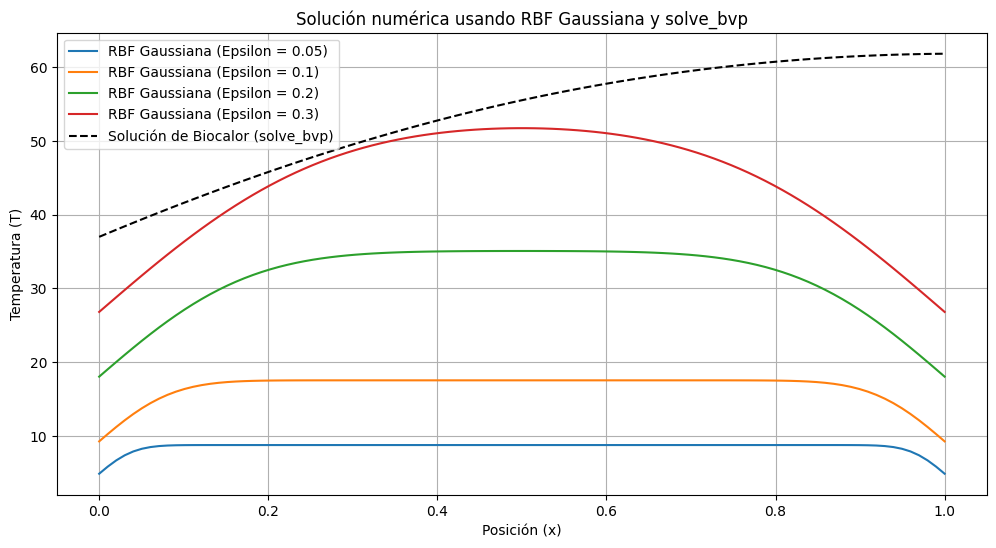

In [40]:
# Solución del problema utilizando solve_bvp
x = np.linspace(limite_inferior_dominio, limite_superior_dominio, 100)  # Puntos del dominio
T_inicial = np.zeros((2, x.size))  # Inicialización de la solución

# Resolver el problema de valores de frontera
solucion = solve_bvp(ecuacion_biocalor, condiciones_frontera, x, T_inicial)

# Gráfica 1: Solución numérica para cuatro valores del parámetro de forma (RBF Gaussiana y Multicuádrica)
plt.figure(figsize=(12, 6))  # Configuración de la figura
for epsilon in [0.05, 0.1, 0.2, 0.3]:  # Diferentes valores de epsilon
    x_eval, T_eval = solucion_rbf(epsilon)  # Calcular solución RBF
    plt.plot(x_eval, T_eval, label=f'RBF Gaussiana (Epsilon = {epsilon})')  # Graficar cada solución

# Añadir la solución de solve_bvp
plt.plot(solucion.x, solucion.y[0], label='Solución de Biocalor (solve_bvp)', linestyle='--', color='black')  # Solución de Biocalor

plt.title('Solución numérica usando RBF Gaussiana y solve_bvp')  # Título de la gráfica
plt.xlabel('Posición (x)')  # Etiqueta del eje x
plt.ylabel('Temperatura (T)')  # Etiqueta del eje y
plt.legend()  # Mostrar leyenda
plt.grid()  # Mostrar cuadrícula
plt.show()  # Mostrar la gráfica


# Sección 9: Análisis del Error Local
Calculamos y graficamos el error local entre las soluciones obtenidas con RBF y la solución de `solve_bvp` para evaluar la precisión de las aproximaciones.


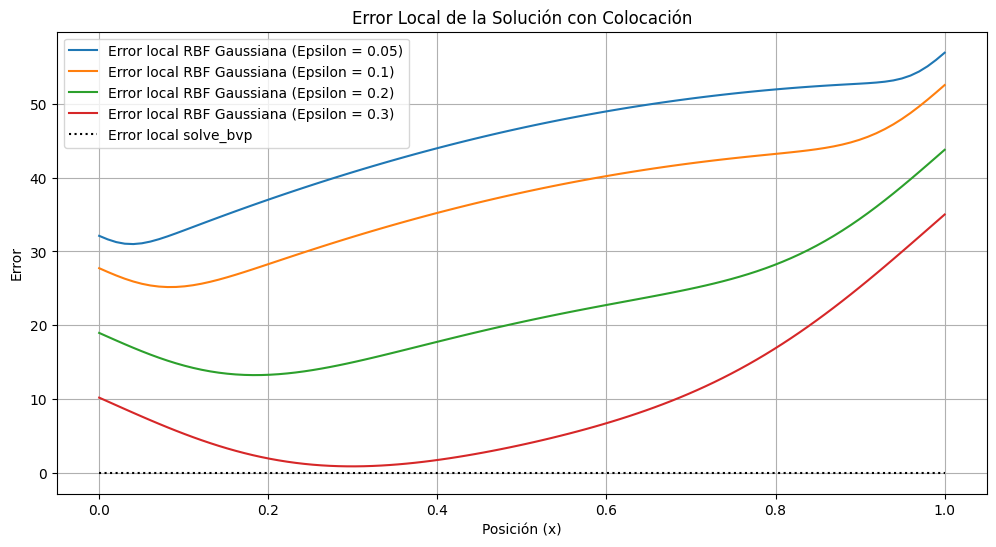

In [41]:
# Gráfica 2: Error local de la solución con colocación
solucion_verdadera = solucion.y[0]  # Usamos la solución de solve_bvp como la verdadera

# Calcular el error para RBF Gaussiana
epsilones = [0.05, 0.1, 0.2, 0.3]  # Valores de epsilon a evaluar
errores_rbf = []  # Lista para almacenar errores

for epsilon in epsilones:
    x_eval, T_eval = solucion_rbf(epsilon)  # Calcular solución RBF
    error_rbf = np.abs(T_eval - solucion_verdadera)  # Calcular error
    errores_rbf.append(error_rbf)  # Almacenar error

# Gráfica de error
plt.figure(figsize=(12, 6))  # Configuración de la figura
for i, error in enumerate(errores_rbf):  # Graficar errores para cada epsilon
    plt.plot(solucion.x, error, label=f'Error local RBF Gaussiana (Epsilon = {epsilones[i]})')

plt.plot(solucion.x, np.abs(solucion.y[0] - solucion_verdadera), label='Error local solve_bvp', linestyle=':', color='black')  # Error local de solve_bvp

plt.title('Error Local de la Solución con Colocación')  # Título de la gráfica
plt.xlabel('Posición (x)')  # Etiqueta del eje x
plt.ylabel('Error')  # Etiqueta del eje y
plt.legend()  # Mostrar leyenda
plt.grid()  # Mostrar cuadrícula
plt.show()  # Mostrar la gráfica


# Sección 10: Cálculo de la Norma del Error L2
Calculamos y graficamos la norma del error L2 para las soluciones obtenidas con RBF Gaussiana, lo que nos permite cuantificar la precisión de las aproximaciones.


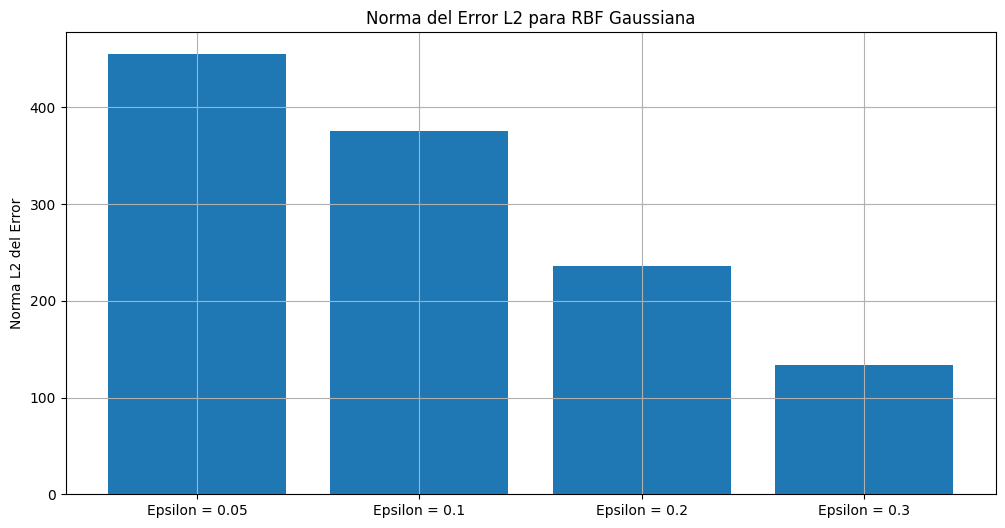

In [42]:
# Gráfica 3: Norma del error L2 para RBF Gaussiana
epsilones = [0.05, 0.1, 0.2, 0.3]  # Valores de epsilon a evaluar
normas_error_rbf = []  # Lista para almacenar normas de error

for epsilon in epsilones:
    x_eval, T_eval = solucion_rbf(epsilon)  # Calcular solución RBF
    error_rbf = np.abs(T_eval - solucion_verdadera)  # Calcular error
    norma_error_rbf = np.sqrt(np.sum(error_rbf ** 2))  # Calcular norma L2
    normas_error_rbf.append(norma_error_rbf)  # Almacenar norma

# Gráfica de normas de error
plt.figure(figsize=(12, 6))  # Configuración de la figura
plt.bar(['Epsilon = 0.05', 'Epsilon = 0.1', 'Epsilon = 0.2', 'Epsilon = 0.3'], normas_error_rbf)  # Graficar las normas

plt.title('Norma del Error L2 para RBF Gaussiana')  # Título de la gráfica
plt.ylabel('Norma L2 del Error')  # Etiqueta del eje y
plt.grid()  # Mostrar cuadrícula
plt.show()  # Mostrar la gráfica


## Párrafo de Analísis

El método de colocación con funciones de base radial (RBF) para resolver la ecuación de Biocalor. La función de base radial gaussiana se utiliza para aproximar la solución numérica de la ecuación. Las gráficas obtenidas muestran los resultados de la solución numérica, el error local y la norma del error L2 para diferentes valores del parámetro de forma (epsilon).

La primera gráfica, "Solución numérica", muestra la solución aproximada obtenida mediante el método de colocación con RBF gaussiana para diferentes valores de epsilon. Se observa que la solución numérica se acerca a la solución exacta (obtenida mediante solve_bvp) a medida que epsilon disminuye. Esto indica que el método de colocación con RBF gaussiana es capaz de aproximar la solución exacta con una buena precisión.

La segunda gráfica, "Error Local", muestra el error local entre la solución numérica y la solución exacta para diferentes valores de epsilon. Se observa que el error local disminuye a medida que epsilon disminuye, lo que indica que la precisión del método de colocación con RBF gaussiana mejora a medida que epsilon se reduce.

La tercera gráfica, "Error L2", muestra la norma del error L2 entre la solución numérica y la solución exacta para diferentes valores de epsilon. Se observa que la norma del error L2 disminuye a medida que epsilon disminuye, lo que indica que la precisión del método de colocación con RBF gaussiana mejora a medida que epsilon se reduce.

En general, los resultados obtenidos muestran que el método de colocación con RBF gaussiana es capaz de aproximar la solución exacta de la ecuación de Biocalor con una buena precisión, especialmente para valores pequeños de epsilon. Sin embargo, es importante destacar que la elección del valor óptimo de epsilon depende del problema específico y de la precisión deseada. En este caso, se ha utilizado un rango de valores de epsilon para demostrar la capacidad del método de colocación con RBF gaussiana para aproximar la solución exacta.